## Clustering


In [227]:
# Remove attr flag from data

In [228]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('../2_data cleaning/Cleaned_data.csv')
data = data.drop(['Unnamed: 0','Attrition_Flag'], axis=1)
data.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,0,3,1,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,40,1,4,2,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
2,44,0,2,1,36,3,1,2,4010.0,1247,...,0,1,0,0,0,0,1,0,0,0
3,51,0,4,1,46,6,1,3,34516.0,2264,...,1,0,0,0,0,0,0,1,0,0
4,32,0,0,2,27,2,2,2,29081.0,1396,...,0,0,1,0,0,0,0,0,0,1


In [229]:
# Select columns for KMeans model
# data = data[['Customer_Age','Gender','Dependent_count','Marital_Status','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon']]
# data.shape

In [230]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)
# sns.set_theme(style="ticks")
# sns.pairplot(data, hue='Attrition_Flag')

In [231]:
# Drop columns irrelevant for clustering

columns_names = data.columns
columns_names

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Marital_Status',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [232]:
data.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,0,3,1,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,40,1,4,2,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
2,44,0,2,1,36,3,1,2,4010.0,1247,...,0,1,0,0,0,0,1,0,0,0
3,51,0,4,1,46,6,1,3,34516.0,2264,...,1,0,0,0,0,0,0,1,0,0
4,32,0,0,2,27,2,2,2,29081.0,1396,...,0,0,1,0,0,0,0,0,0,1


In [233]:
# Define number of clusters
cluster_size = 3


# Z-score Normalisation with Standard Scaler from SKlearn: returns an nparray
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(data)
data_scaled = scaler.transform(data)

# Cluster data and create labels
kmeans = KMeans(n_clusters=cluster_size, init='k-means++', n_init='auto')
kmeans.fit(data_scaled)

# Build again a df with standardized datas and columns names
data_scaled_df = pd.DataFrame(data = data_scaled,
                                columns = columns_names)

# Build a pd series from labels and give a column name
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

# # Build a pd series with the names from original pokemon df
# pokemon_names = pd.Series(data['name'], name='name')

# Concat Scaled and cluster labelled for Pokemon selection
data_scaled_labelled_df = pd.concat([data_scaled_df, cluster_labels], axis=1)

# # Concat the cluster label series and names series to scaled df
# pokemon_scaled_labelled_named_df = pd.concat([pokemon_scaled_df, cluster_labels, pokemon_names], axis=1)

data_scaled_labelled_df.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,cluster
0,-0.165088,-1.060796,0.503682,0.195793,0.384899,0.764115,-1.328025,0.491862,0.446849,-0.473361,...,-0.463364,2.496349,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,0
1,-0.788935,0.942688,1.273948,1.365002,-0.241281,-0.522668,1.643060,-1.317388,-0.584982,1.661984,...,-0.463364,-0.400585,-0.422444,1.357013,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,1
2,-0.289858,-1.060796,-0.266584,0.195793,0.009191,-0.522668,-1.328025,-0.412763,-0.508293,0.103428,...,2.158130,-0.400585,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,2
3,0.583529,-1.060796,1.273948,0.195793,1.261552,1.407507,-1.328025,0.491862,2.848181,1.351500,...,-0.463364,-0.400585,-0.422444,-0.736913,-0.351188,-3.692014,9.281981,-0.044521,-0.241008,0
4,-1.787091,-1.060796,-1.807115,1.365002,-1.117933,-1.166060,-0.337663,-0.412763,2.250186,0.286282,...,-0.463364,2.496349,-0.422444,-0.736913,-0.351188,-3.692014,-0.107736,-0.044521,4.149243,0


In [234]:
cluster_center =  kmeans.cluster_centers_
centroid_df = pd.DataFrame(cluster_center, columns=columns_names)
centroid_df

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.006220,-0.933320,0.085747,0.016253,0.006023,-0.025780,-0.023586,0.023007,0.701796,0.035283,...,0.426278,-0.388502,0.613923,0.647423,-0.654561,-0.298305,-0.412125,0.162760,0.068232,0.367161
1,0.004365,0.791293,-0.061391,-0.024228,-0.000199,0.018000,0.027498,-0.033198,-0.582838,-0.025333,...,-0.278147,-0.463364,-0.400585,-0.422444,1.357013,-0.351188,0.269690,-0.107736,-0.044521,-0.239717
2,-0.014602,0.380798,-0.049140,0.006448,-0.008601,0.015346,0.000233,0.007753,-0.301559,-0.020130,...,-0.278147,1.150828,-0.400585,-0.422444,-0.736913,0.877889,0.267938,-0.104280,-0.044521,-0.239392


## Plot centroids

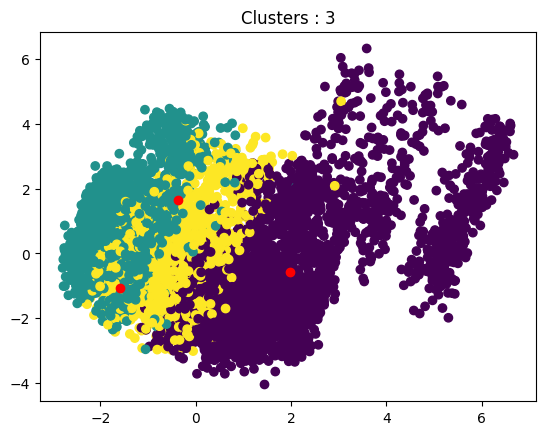

In [238]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def plot_clusters(data, labels, centroids):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids)
    
    plt.title(f"Clusters : {len(centroid_df)}")
    plt.scatter(x=data_2d[:,0], y= data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y= centroids_2d[:,1], c="red")
    plt.show()

# kmeans.labels_
plot_clusters(data_scaled, cluster_labels, cluster_center)

## Optimal k

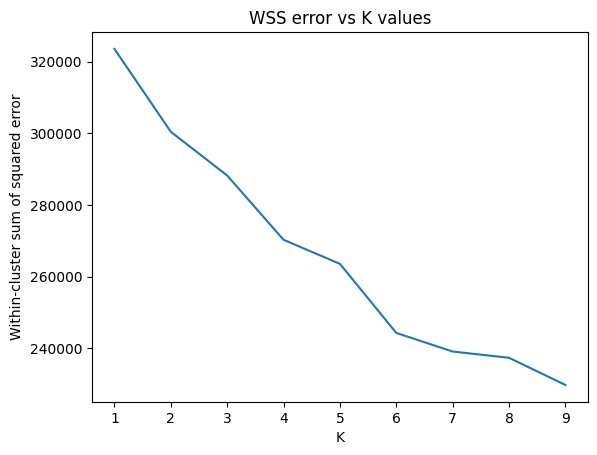

In [236]:
# Optimal k
# Elbow & Silhouette Score 
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

# WSS error is the Within-cluster sum of squared error
wss = []
#deciding k range-here the dataset has few rows thats why i am taking k range (1,10)
k_rng = range(1,10)
#perform iterations
for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init="auto")
    
    # Elbow
    kmeans.fit(data_scaled)
    wss.append(kmeans.inertia_)
    
    # Silhouette
    # cluster_labels = kmeans.fit_predict(data_scaled)
    # silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    # print(f"For n_clusters = {k}\nThe average silhouette_score is :{silhouette_avg}")


plt.xlabel('K')
plt.ylabel('Within-cluster sum of squared error')
plt.title('WSS error vs K values')
plt.plot(k_rng,wss)



In [237]:
# visualise Clustering using seaborn

# sns.set_theme(style="ticks")
# sns.pairplot(data_scaled_labelled_df, hue="cluster")